# Example

![](hlsp_hugs_hst_wfc3-uvis_ngc6656_multi_v1_cmd.png)


In [3]:
from bokeh.plotting import output_notebook, figure, show,ColumnDataSource
from bokeh.models import HoverTool, tools
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord


from bokeh.models.ranges import Range1d

import aplpy

output_notebook()


Loading BokehJS ...

In [4]:
f275 = [ ]
f336 = [ ]

ra = []
member = [ ]

dec = []

color = []
size=[]
closestarsindex = []
ind = []

cat = 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6656_multi_v1_catalog-meth1.txt'

with open(cat,'r') as file:
    for index, line in enumerate(file):
    #for line in file:
        line = line.strip()
        if not line:  # line is blank
            continue
        if line.startswith("#"):  # comment line
            continue
        b = line.split()
        #if float(b[2]) != -99.9999 and float(b[8]) != -99.9999 and float(b[32]) > 90.:
        if float(b[2]) != -99.9999 and float(b[8]) != -99.9999:

            ind.append(index+1)
            f275.append(float(b[2]))
            f336.append(float(b[8]))
            membertemp = float(b[32])
            member.append(membertemp)

            c1 = SkyCoord(float(b[33])*u.deg, float(b[34])*u.deg, frame='fk5')
            rahmsstr = c1.ra.to_string(u.hour)
            decdmsstr = c1.dec.to_string(u.degree, alwayssign=True)
            ra.append(rahmsstr)
            dec.append(decdmsstr)
            #Center MUSe and separation
            c2 = SkyCoord(279.1002500*u.deg, -23.9088889*u.deg, frame='fk5')
            sep = c1.separation(c2)

            if sep.deg < 0.0009722:
                closestarsindex.append(index)
                color.append('red')
                size.append(4)
            else:
                color.append('green')
                size.append(1)

            


In [5]:
p = figure(plot_width=800, plot_height=500)

f275 = np.array(f275)
f336 = np.array(f336)

xval = f275-f336

yval = f275


#Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ("File index", "@ind"),
            ('(ra,dec)', '(@ra,@dec)')
        ]
    )

        
p.add_tools(hover2)

source = ColumnDataSource(data=dict(
    x=xval,
    y=yval,
    ra=ra,
    dec=dec,
    color=color,
    ind = ind,
    size=size
))


# add a circle renderer with a size, color, and alpha
p.circle('x','y', color='color',size='size',source=source)




#p = Scatter(data, x=xval, y=yval, title=title, xlabel=xlabel, ylabel=ylabel)
xmax = xval.max()
xmin = xval.min()
ymax = yval.min()
ymin = yval.max()
p.x_range = Range1d(xmin, xmax)
p.y_range = Range1d(ymin, ymax)
show(p)

In [35]:
! sed '50649q;d'  hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6656_multi_v1_catalog-meth1.txt

   4900.9443   4684.3750      24.2426      0.1788      0.8472     -0.0339 10  2      22.5876      0.0374      0.9865     -0.0019  4  1      22.1218      0.0013      0.9917     -0.0588  2  1      19.3136      0.0000      0.8147     -0.1706  1  1      18.1407      0.0000      0.7874     -0.3383  1  1  40.9           279.101016          -23.908238   R0050665   9 


In [7]:
color2=np.array(color)
closestars = np.where(color2 == 'red')[0]


# Make Region

In [8]:
#region to plot
findreg = 'closestars.reg'



with open(findreg,'w') as fileone:
    for index in closestars:
            text='fk5; circle({0},{1},.1") # color=red text={2} \n'.format(ra[index],dec[index],'{'+str(ind[index])+"}")
            #text='fk5; circle({0},{1},.1") # color=red text=\{{2}\}\n'.format(ra[index],dec[index],index)
            fileone.write(text)
            #print(text)

# Make figure

INFO: Auto-setting vmin to -3.960e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.371e+02 [aplpy.core]


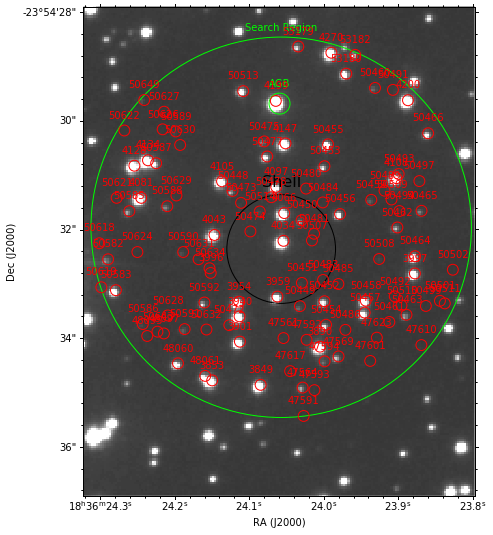

In [29]:
fig = aplpy.FITSFigure('hlsp_hugs_hst_wfc3-uvis_ngc6656_f275w_v1_stack-0812s.fits')
fig.show_grayscale()
fig.recenter(279.1002500, -23.9090000, width=0.002, height=0.0025)  # degree
fig.show_regions('all.reg')